In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions
from stable_baselines3 import PPO
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [70]:
df = pd.read_csv('UPS_1Y_Stock.csv', index_col='Date', parse_dates=['Date'])

window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [71]:
env.reset()
model = PPO('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=50000)
# save the model

model.save("UPS_RL_Model")

info: {'total_reward': 49.85003662109375, 'total_profit': 0.8461904851578426, 'position': <Positions.Long: 1>}


e:\Users\hcang\anaconda3\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


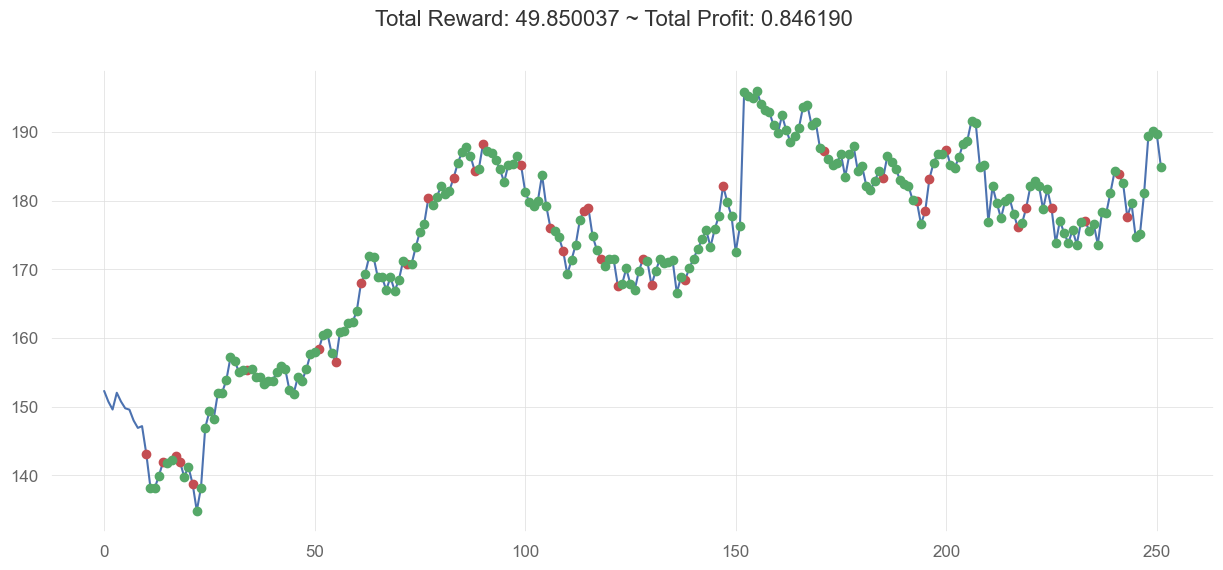

In [72]:
observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        break

env.close()
print("info:", info)
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Randomly Generated Actions

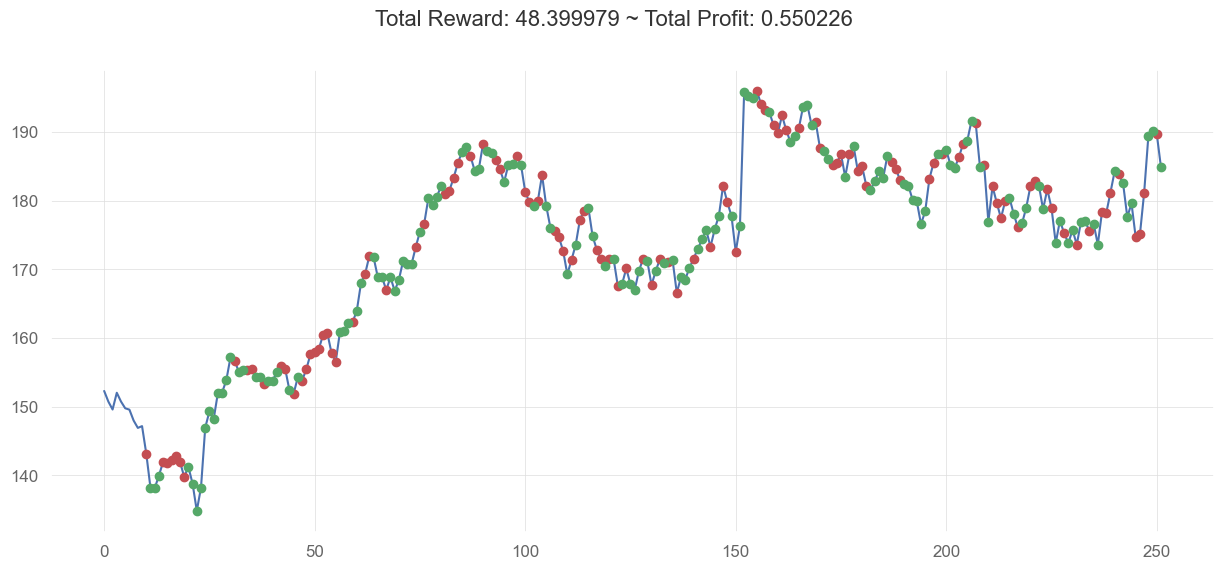

In [73]:
state = env.reset()
while True:
    action = env.action_space.sample()
    #https://stackoverflow.com/questions/73195438/openai-gyms-env-step-what-are-the-values
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()